# Residual Magnitude Bar Plots
Nikki and I think this would be a good motivating figure for the paper. We're looking at doing 3 bar plots for each system that act as metrics for the magnitude of internal variability. One bar for contemporary, one bar for natural, one bar for anthropogenic. This will show that natural carbon dominates the signal, and thus we can do our investigations with natural. 

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import esmtools as et
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ocn-clim')
import seaborn as sns

In [2]:
def load_in_filtered_data(VAR, EBU, AW=True):
    """
    Loads in the netCDF files for the ensemble mean and residuals for any inputted variable
    and returns an xarray dataset for the forced signal, residuals, and the total time series
    (simply the sum of the two previous components).
    """
    fileDir = '/glade/p/work/rbrady/EBUS_BGC_Variability/' + VAR + '/' + EBU + '/filtered_output/'
    if AW == True:
        ds_forced = xr.open_dataset(fileDir + EBU.lower() + '-' + VAR + '-forced-signal-AW-chavez-800km.nc')
        ds_residuals = xr.open_dataset(fileDir + EBU.lower() + '-' + VAR + '-residuals-AW-chavez-800km.nc')
    if AW == False:
        ds_forced = xr.open_dataset(fileDir + EBU.lower() + '-' + VAR + '-forced-signal-chavez-800km.nc')
        ds_residuals = xr.open_dataset(fileDir + EBU.lower() + '-' + VAR + '-residuals-chavez-800km.nc')
    ds_total = ds_forced + ds_residuals
    if AW == True:
        return ds_forced[VAR + '_AW'], ds_residuals[VAR + '_AW'], ds_total[VAR + '_AW']
    else:
        return ds_forced[VAR], ds_residuals[VAR], ds_total[VAR]

In [8]:
values_master = []
labels_master = []
system_master = []
EBC = ['CalCS', 'HumCS', 'CanCS', 'BenCS']
full_name = ['California', 'Humboldt', 'Canary', 'Benguela']
for x, i in enumerate(EBC):
    # Load in Residuals
    _, nat, _ = load_in_filtered_data('FG_ALT_CO2', i)
    _, ant, _ = load_in_filtered_data('FG_ANT_CO2', i)
    _, con, _ = load_in_filtered_data('FG_CO2', i)
    # Take std for each simulation
    nat_var = nat.var(dim='time').values
    ant_var = ant.var(dim='time').values
    con_var = con.var(dim='time').values
    # Create temporary lists
    values = np.concatenate((con_var, nat_var, ant_var), axis=0)
    labels = ["contemporary"]*34 + ["natural"]*34 + ["anthropogenic"]*34
    system = [full_name[x]]*len(labels)
    # Add to main array
    values_master = np.concatenate((values_master, values), axis=0)
    labels_master = np.concatenate((labels_master, labels), axis=0)
    system_master = np.concatenate((system_master, system), axis=0)

In [9]:
# Create DataFrame
d = {'values': values_master, 'labels': labels_master, 'system': system_master}
df = pd.DataFrame(d)

/glade/u/home/rbrady/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


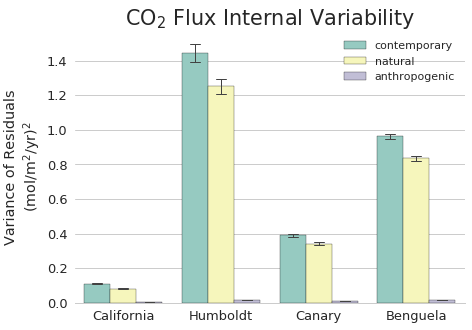

In [11]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
sns.barplot(x="system", y="values", hue="labels", data=df,
                   ci=95, capsize=0.1, errwidth=1,
                   ax=ax, palette="Set3")
ax.set_ylabel('Variance of Residuals' + '\n' +  '(mol/m$^{2}$/yr)$^{2}$', fontsize='large')
ax.set_xlabel('')
ax.set_title('CO$_{2}$ Flux Internal Variability', fontsize='xx-large')
ax.tick_params(which='both', labelsize=13)
ax.legend(loc="upper right", fontsize=11)
sns.despine(left=True)
plt.show()